In [1]:
from robotodo.engines.isaac._kernel import configure_default_kernel
configure_default_kernel(
    extra_argv=[
        "--/log/file=/tmp/isaacsimcam.log",
        # "--/app/enableStdoutOutput=true",

        # TODO
        # "--/omni/replicator/captureOnPlay=false",
    ], 
)

# import warp
# warp.config.mode = "debug"
# warp.config.verify_cuda = True

In [2]:
%load_ext autoreload
%autoreload complete

import sys
import importlib
import warnings

importlib.invalidate_caches()

for mod_name in list(sys.modules):
    if not (str.startswith(mod_name, "robotodo") or str.startswith(mod_name, "tensorspecs")):
        continue
    try:
        importlib.reload(sys.modules[mod_name])
    except Exception as error:
        warnings.warn(f"{error}")

In [3]:
from robotodo.engines.isaac.scene import Scene

In [4]:
scene = Scene.create()

[Warning] [simulation_app] Interactive python shell detected but ISAAC_JUPYTER_KERNEL was not set. Problems with asyncio may occur
[Warning] [simulation_app] Please use Isaac Sim Python 3 kernel instead of the default Python 3 Kernel
Loading user config located at: '/home/sysadmin/lab/robotodo/.conda/lib/python3.11/site-packages/omni/data/Kit/Isaac-Sim Full/5.0/user.config.json'

|---------------------------------------------------------------------------------------------|
| Driver Version: 535.247.01    | Graphics API: Vulkan
|=============================================================================================|
| GPU | Name                             | Active | LDA | GPU Memory | Vendor-ID | LUID       |
|     |                                  |        |     |            | Device-ID | UUID       |
|     |                                  |        |     |            | Bus-ID    |            |
|---------------------------------------------------------------------------------

2025-11-28T08:29:49Z [12,446ms] [Error] [isaacsim.ros2.bridge.impl.extension] ROS2 Bridge startup failed
2025-11-28T08:29:50Z [13,555ms] [Error] [carb.graphics-vulkan.plugin] Could not get NGX parameters block because NGX isn't enabled.
2025-11-28T08:29:50Z [13,555ms] [Error] [carb.graphics-vulkan.plugin] Failed to create NGX context.
2025-11-28T08:29:50Z [13,645ms] [Error] [rtx.optixdenoising73.plugin] Failed to create an Optix adaptor for device 0


In [10]:
s = scene._kernel.get_settings()
d = s.get_settings_dictionary().get_dict()
d["app"]["hangDetector"]

{'enabled': False, 'timeout': 120, 'alwaysEnabled': False}

In [5]:
from robotodo.engines.isaac.sensor import Camera

In [6]:
cam = Camera.create("/Camera{0..5}", scene=scene)

In [8]:
import omni
await omni.kit.app.get_app().next_update_async()

0.016666666666666666

In [37]:
omni.replicator.core.orchestrator.get_status()

<Status.STEPPED: 8>

In [28]:
import omni
omni.replicator.core.orchestrator.preview()

In [38]:
omni.replicator.core.orchestrator.run()


In [17]:
omni.replicator.core.orchestrator.step_async?


Signature:
omni.replicator.core.orchestrator.step_async(
    rt_subframes: int = -1,
    pause_timeline: bool = True,
    delta_time: float = None,
    wait_for_render: bool = True,
) -> None
Docstring:
Step one frame

If Replicator is not yet started, an initialization step is first taken to ensure the necessary settings are set
for data capture. The renderer will then render as many subframes as required by current settings and schedule a
frame to be captured by any active annotators and writers.

Args:
    rt_subframes: Specify the number of subframes to render. During subframe generation, the simulation is paused.
        This is often beneficial when large scene changes occur to reduce rendering artifacts or to allow materials
        to fully load. This setting is enabled for both RTX Real-Time and Path Tracing render modes. Values must be
        greater than ``0``.
    pause_timeline: If ``True``, pause timeline after step. Defaults to ``True``.
    delta_time: The amount of ti

In [32]:
scene._kernel.start_app_loop_soon()

In [39]:
import omni

await omni.replicator.core.orchestrator.step_async(
    # rt_subframes=1, 
    delta_time=0, 
    pause_timeline=False,
    wait_for_render=True,
)


frame = cam._isaac_get_render_annotator(
    name="rgb",
    resolution=cam.Resolution(256, 256),
    copy=True,
).get_data()

import warp
import matplotlib.pyplot as plt

plt.imshow(warp.to_torch(frame).cpu().numpy())

CancelledError: 

In [ ]:
omni.replicator.core.orchestrator.step_async?

Object `omni.replicator.core.orchestrator.step_async` not found.


In [55]:
scene._kernel.get_settings().get("/omni/replicator/asyncRendering")

False

In [36]:
scene._kernel.get_settings().get("/omni/replicator/captureOnPlay")

True

In [90]:
import omni
omni.replicator.core.orchestrator.preview()

In [50]:
print(frame)

[[[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 ...

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0   0]
  [  0   0   0   0]
  [  0   0   0   0]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0   0]
  [  0   0   0   0]
  [  0   0   0   0]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0   0]
  [  0   0   0   0]
  [  0   0   0   0]]]


In [51]:
import warp
warp.to_torch(frame)

tensor([[[  0,   0,   0, 255],
         [  0,   0,   0, 255],
         [  0,   0,   0, 255],
         ...,
         [  0,   0,   0, 255],
         [  0,   0,   0, 255],
         [  0,   0,   0, 255]],

        [[  0,   0,   0, 255],
         [  0,   0,   0, 255],
         [  0,   0,   0, 255],
         ...,
         [  0,   0,   0, 255],
         [  0,   0,   0, 255],
         [  0,   0,   0, 255]],

        [[  0,   0,   0, 255],
         [  0,   0,   0, 255],
         [  0,   0,   0, 255],
         ...,
         [  0,   0,   0, 255],
         [  0,   0,   0, 255],
         [  0,   0,   0, 255]],

        ...,

        [[  0,   0,   0, 255],
         [  0,   0,   0, 255],
         [  0,   0,   0, 255],
         ...,
         [  0,   0,   0,   0],
         [  0,   0,   0,   0],
         [  0,   0,   0,   0]],

        [[  0,   0,   0, 255],
         [  0,   0,   0, 255],
         [  0,   0,   0, 255],
         ...,
         [  0,   0,   0,   0],
         [  0,   0,   0,   0],
         

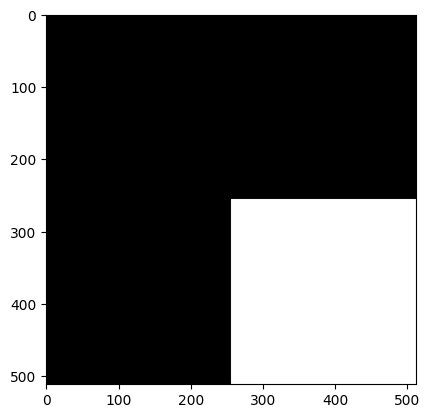

In [ ]:
import warp
import matplotlib.pyplot as plt

plt.imshow(warp.to_torch(frame).cpu().numpy())

In [48]:
import time

start_time = time.perf_counter_ns()
await cam.read_rgba()
(time.perf_counter_ns() - start_time) * 1e-6

35.674425

In [19]:
for _ in range(1_000):
    await cam.read_rgba()

CancelledError: 

In [29]:
import time
import torch

for _ in range(100):
    start_time = time.perf_counter_ns()
    (await cam.read_rgba()).shape
    torch.cuda.synchronize()
    print((time.perf_counter_ns() - start_time) / 1e6)

1.182079
1.882637
1.328622
0.999617
0.383302
0.364853
0.343126
0.396185
0.319987
0.300004
0.561845
0.403963
0.393874
0.385398
0.368463
0.331604
0.32771
0.426065
0.355596
0.473766
0.348134
0.31261
0.527482
0.364644
0.473218
0.307788
0.376112
0.31289
0.291486
1.328566
1.496195
0.996514
0.340502
0.292354
0.30097
0.310125
0.432609
0.345988
0.397499
0.405413
0.53417
0.53797
0.495009
0.402849
0.337386
0.306804
0.306073
0.286355
0.326968
0.337301
0.28693
0.339619
0.325243
0.441914
0.633528
0.562997
0.38673
0.323752
0.306271
1.338346
1.365297
0.994089
0.405038
0.303034
0.283683
0.318262
0.298191
0.296729
0.489266
0.365488
0.50091
0.337911
0.335974
0.307703
0.329301
0.307491
0.466001
0.392901
0.337206
0.532592
0.376202
0.337769
0.344058
0.37892
0.465125
0.612524
0.495706
0.468575
0.597041
0.497932
0.490108
0.449836
1.317507
1.329701
0.995594
0.449509
0.375505
0.366398
0.365087
0.367918


In [69]:
frame = await cam.read_rgba((1280, 720))
frame.shape

torch.Size([3, 1280, 720, 4])

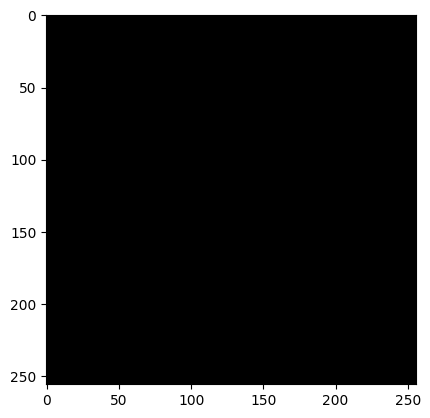

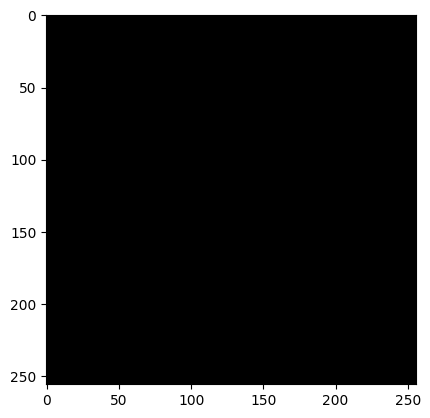

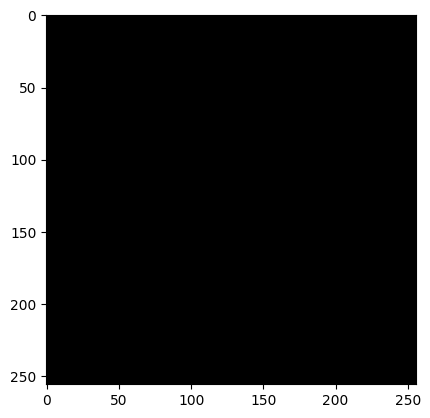

In [22]:
cam.viewer.show()

In [8]:
cam.viewer.show()


Warp CUDA error 1: invalid argument (in function memcpy_d2d, /builds/omniverse/warp/warp/native/warp.cu:785)
